## Dynamics in a harmonic trap

The equation of motion of the center of masses of two particles, driven by external forcing and harmonically confined using optical trap, is

$$
\dot{\mathbf{R}_1} = \mu_{11}  (-k_1 \mathbf{R}_1 + \mathbf{F}_1) + \mu_{12}(-k_2 \mathbf{R}_2 + \mathbf{F}_2)
$$

$$
\dot{ \mathbf{R}_2} = \mu_{22}  (-k_2 \mathbf{R}_2 + \mathbf{F}_2) + \mu_{21}(-k_1 \mathbf{R}_1 + \mathbf{F}_1)
$$

where, 

$$
\mu_{ii} = \frac{1}{(6\pi\eta a)}
$$

$$
\mu_{ij} =  \mathbb{F}^0 \mathbb{F}^0\mathbf{G} (\mathbf{R}_2- \mathbf{R}_1), \qquad i\neq j
$$


where $\mathbb{F}^0 = (1 + \frac{a^2}{6}\nabla^2)$ is the Faxen correction. Lets consider the first particle without any hydrodynamic interaction to get the scales of the system,

$$\dot{\mathbf{R}}_1 + \mu k \mathbf{R}_1 = \mu \mathbf{F}$$

with the solution,

$$\mathbf{R}_1(t)  = \mathbf{R}_1 (0) e^{-\Gamma t} + \mu \int_{0}^{t} e^{\Gamma (s-t)} \mathbf{F}(s)ds $$

Here, $\Gamma = \mu k = \frac{k}{6 \pi \eta a}$ is a rate associated with the relaxation of the particle. The rate increases with the stiffness of the trap and decreases with the viscosity and the size of the particle. Assuming the time scale of the external forcing to be $\tau$, the dynamics has three distinct regimes, $\Gamma\tau \gg 1$, $\Gamma\tau \sim 1$, $\Gamma\tau \ll 1$. We explore these three regimes below. We import some useful modules before beginning the simulation. 

We define three dimensionless numbers,
$$
\lambda_1 = \frac{k_1 \tau}{\eta a}
$$

$$
\lambda_2 = \frac{k_2 \tau}{\eta a}
$$

$$
\lambda_3 = \frac{f_0 \tau}{\eta a2}
$$
where, $f_0$ is the strength of the driving signal. The user is supposed to supply these three numbers based on the experimental paramaters. The length is rescaled in terms of particle's radius and time is rescaled in terms of the signal time period.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import opticalTrap
import scipy.io as sio 


In [2]:

#Parameters
a, Np = 1, 2                    # radius, number of particles               
ljrmin, ljeps  = 3.0, 0.0001    # Lennard jones parameters
sForm, tau = 1, 1/8              # signal specification

#dimensionless numbers
lmda1, lmda2, lmda3 = 3060/8, 2156/8, 1040/8            # see the notes

# instantiate the optical trap
rm = opticalTrap.Rbm(a, Np, ljeps, ljrmin, sForm, tau, lmda1, lmda2, lmda3)


# initialise the system. 
x0 = np.zeros(Np*3);       #memory allocation
x0[0], x0[1], x0[2]  = -2.5, 0.0, 0.0         #Initial condition of first particle
x0[3], x0[4], x0[5]  = 2.5, 0.0, 0.0         # second particle displaced by 5a     

## now initialise the system
rm.initialise(x0)


# simulate the resulting system
T, nsteps = 10*tau, 500
filename='Np=2.mat'

rm.simulate(T, nsteps, filename)

In [3]:
## Load the data and reconstruct the force
import scipy.io as sio
from scipy.signal import square

data  = sio.loadmat('Np=2.mat')
X     = data['X']
tm    = data['t']
NN = np.size(X[:, 1]); t = tm.reshape(NN)
F = lmda3*square(2*np.pi*t/tau)

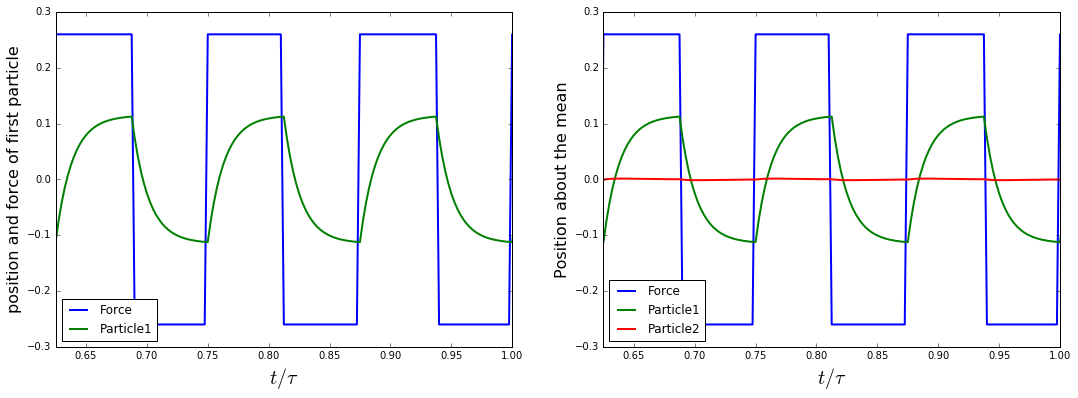

In [8]:
# Now plot the results
f = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
f.add_subplot(1, 2, 1) 
plt.plot(t, 0.002*F, t, X[:,0]- np.mean(X[10:,0]), linewidth=2)
plt.xlabel(r'$t/\tau$', fontsize=20)
plt.ylabel('position and force of first particle',fontsize=16);
plt.xlim([5*tau, 8*tau]); #ylim([-1.2, 1.2])
plt.legend( ('Force', 'Particle1'), loc='lower left')

f.add_subplot(1, 2, 2) 
plt.plot(t, 0.002*F , t , X[:, 0] - np.mean(X[10:,0]), t , X[:, 3] - np.mean(X[10:,3]), linewidth=2) 
plt.xlabel(r'$t/\tau$', fontsize=20);
plt.xlim([5*tau, 8*tau]); #ylim([-1.2, 1.2])
plt.ylabel('Position about the mean',fontsize=16)
plt.legend( ('Force', 'Particle1', 'Particle2'), loc='lower left');
plt.show()